# **<ins>Gradient (Vanilla) Descent</ins>**
**Type of Content** : Documentation

**Domain** : Machine Learning

**Module** : Dimensionality Reduction & Neural Networks

Gradient descent is an iterative optimization algorithm which is used in minimization of the objective function in various machine learning algorithms. So, it is basically used for updating the parameters of the learning model.<br>
There are many types and variants of the gradient descent algorithms. Vanilla gradient descent is the simplest form of gradient descent algorithm. It is also known as <b>Batch Gradient Descent</b>.<br> Its main feature is that we take small steps in the direction of the minima by taking gradient of the cost function.

Here is the pseudocode for it:<br>
`update = learning_rate * gradient_of_parameters
parameters = parameters - update`

It calculates the error for each data in the training dataset, but the model is updated only after all training data have been evaluated. This whole process is like a cycle and it's called a training epoch.
<br>
Here the gradient is computed as the average of the gradient of each datapoint: 
<a href="https://www.codecogs.com/eqnedit.php?latex=\bigtriangledown&space;f=\frac{1}{n}\sum_{i}^{}&space;\bigtriangledown&space;loss\left&space;(&space;{x_{i}}^{}&space;\right&space;)" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\bigtriangledown&space;f=\frac{1}{n}\sum_{i}^{}&space;\bigtriangledown&space;loss\left&space;(&space;{x_{i}}^{}&space;\right&space;)" title="\bigtriangledown f=\frac{1}{n}\sum_{i}^{} \bigtriangledown loss\left ( {x_{i}}^{} \right )" /></a>

Some advantages of batch gradient descent are its <b>computational efficient</b>, it produces a stable error gradient and a stable convergence. Some disadvantages are that the stable error gradient can sometimes result in a state of convergence that isn’t the best the model can achieve. It also requires the entire training dataset be in memory and available to the algorithm.
<br><img src="https://cs231n.github.io/assets/nn3/learningrates.jpeg" style="width:50%">
The quantity that is useful to track during training is the loss, as it is evaluated on the individual batches during the forward pass. The above graph depicts the effects of different learning rates by plotting loss function vs epoch. Learning rate is a hyper-parameter and should be treated with care when choosing its value.

Cost function is calculated as:
<a href="https://www.codecogs.com/eqnedit.php?latex=J\left&space;(&space;\Theta&space;\right&space;)=\frac{1}{2m}\sum_{i=1}^{m}\left&space;(&space;h&space;(\Theta)&space;^{(i)}&space;-&space;y^{(i)}\right)^{2}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?J\left&space;(&space;\Theta&space;\right&space;)=\frac{1}{2m}\sum_{i=1}^{m}\left&space;(&space;h&space;(\Theta)&space;^{(i)}&space;-&space;y^{(i)}\right)^{2}" title="J\left ( \Theta \right )=\frac{1}{2m}\sum_{i=1}^{m}\left ( h (\Theta) ^{(i)} - y^{(i)}\right)^{2}" /></a>

Here we will implement the gradient descent to optimise the coeffiecients of Linear Regression.

## Importing required libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats 
from sklearn.datasets.samples_generator import make_regression
%matplotlib inline

### generating regression dataset and plotting scatter plot

In [29]:
X, y = make_regression(n_samples = 1000, n_features=1, n_informative=1, noise=20, 
                       random_state=2019)

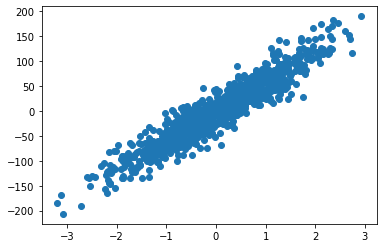

In [40]:
# scatter plot
plt.scatter(X,y)

### Plotting OLS Regression
OLS is a type of linear regression that estimates the relationship by minimizing the total squared error.

In [31]:
x = X.flatten()
slope, intercept,_,_,_ = stats.linregress(x,y)
print (slope)
print (intercept)

58.6910964598614
-1.3279348703608767


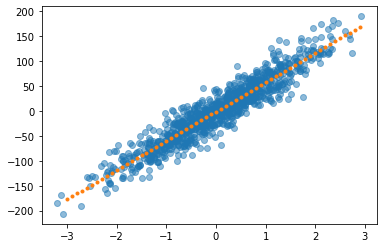

In [32]:
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

In [33]:
y = y.reshape(-1,1)

### Function to calculate cost function for linear regression
This function is used to calculate the cost function J(θ). After that, we will create a gradient decent implementation.

In [42]:
def cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

### Gradient descent function to calculate the gradients and store the cost history
Here we will calculate the gradient decent value for each iteration while updating the decent value.

In [36]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, X, y)
    return theta, cost_history, theta_history

### Calculating MSE with Gaussian distribution
Learning rate= 0.05<br>
Number of iterations= 1000

In [41]:
lr = 0.05
n_itr = 1000
theta = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_itr)
print("Theta0: {:0.3f},\nTheta1:{:0.3f}".format(theta[0][0], theta[1][0]))
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))

Theta0: -1.328,
Theta1:58.691
Final cost/MSE:  219359210.817


### Plotting cost history over 1000 iterations 

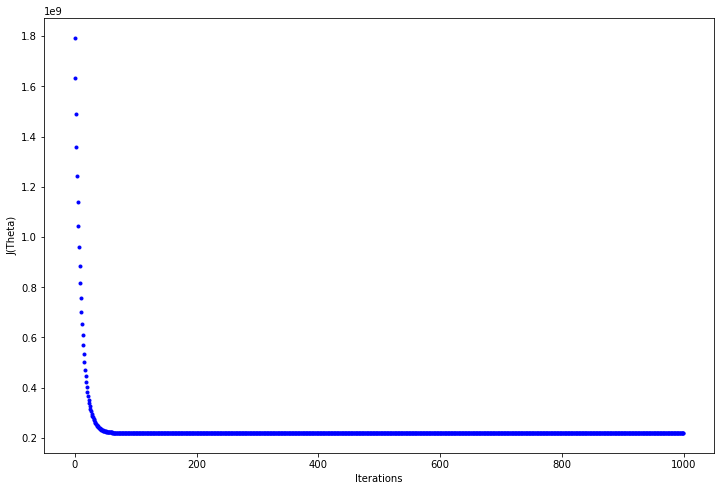

In [43]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_itr),cost_history,'b.')

We can see from the above plot that after around 50-60 iterations, the curve is flat so the remaining iterations are not required for optimization. We will obtain curve for 80 iterations and observe it.

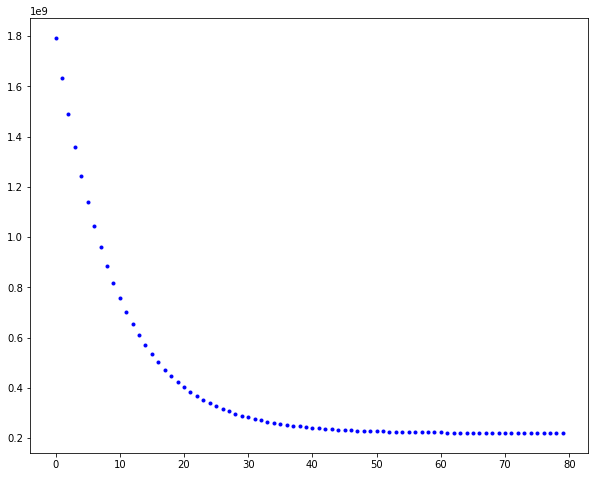

In [46]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(80),cost_history[:80],'b.')

We observe that it has very quick convergence ratio to a global minimum if the loss function is convex (and to local minimum one for non-convex functions). <br>
We can use this fixed learning rate during training without worrying about learning rate decay.
The goal of all supervised machine learning algorithms is to best estimate a target function (f) that maps input data (X) onto output variables (Y). This describes all classification and regression problems.

## References
- https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/
- https://builtin.com/data-science/gradient-descent